## Loading Data

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.763,1.15,4.520,5.513,49.0,25.65
1,0.770,1.41,4.582,5.647,75.0,25.50
2,0.747,1.16,4.515,5.083,91.0,25.45
3,0.718,1.61,4.614,6.181,68.0,25.45
4,0.707,1.34,4.568,4.705,73.0,25.50


In [36]:
'''
Significant wave height, an average of the highest third of the waves in a record
The maximum wave height in the record
The zero upcrossing wave period
The peak energy wave period
Direction (related to true north) from which the peak period waves are coming from
Approximation of sea surface temperature
显著波高，记录中最高的三分之一的平均波高
记录中的最大浪高
零上行波周期
能量波的峰值周期
峰值周期波来自的方向(与真北有关)
海面温度近似值
'''

'\nSignificant wave height, an average of the highest third of the waves in a record\nThe maximum wave height in the record\nThe zero upcrossing wave period\nThe peak energy wave period\nDirection (related to true north) from which the peak period waves are coming from\nApproximation of sea surface temperature\n显著波高，记录中最高的三分之一的平均波高\n记录中的最大浪高\n零上行波周期\n能量波的峰值周期\n峰值周期波来自的方向(与真北有关)\n海面温度近似值\n'

## Visualization of the Features

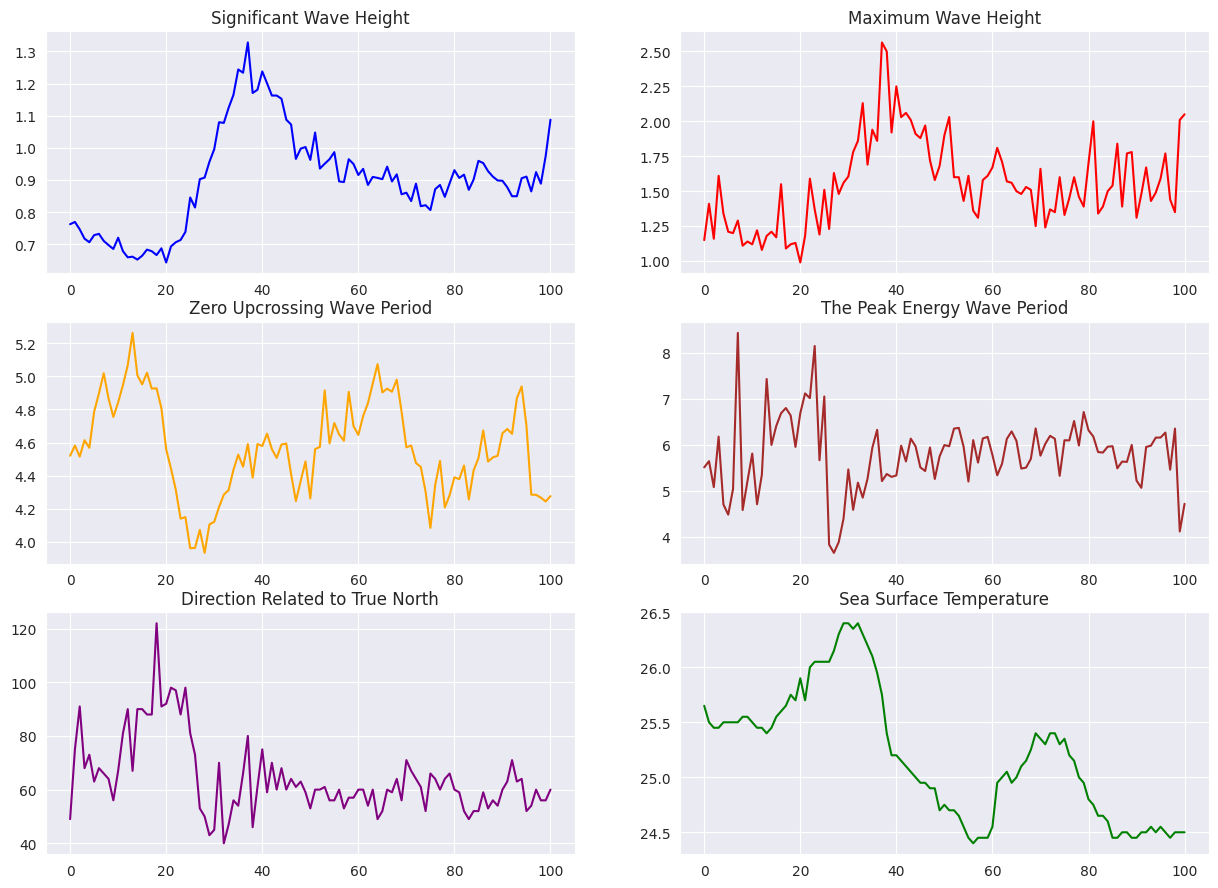

In [37]:
df_graph = df.loc[0:100]

plt.figure(figsize=(15, 22))
plt.subplot(6, 2, 1)
plt.plot(df_graph['Hs'], color='blue')
plt.title('Significant Wave Height')

plt.subplot(6, 2, 2)
plt.plot(df_graph['Hmax'], color='red')
plt.title('Maximum Wave Height')

plt.subplot(6, 2, 3)
plt.plot(df_graph['Tz'], color='orange')
plt.title('Zero Upcrossing Wave Period')

plt.subplot(6, 2, 4)
plt.plot(df_graph['Tp'], color='brown')
plt.title('The Peak Energy Wave Period')

plt.subplot(6, 2, 5)
plt.plot(df_graph['Peak Direction'], color='purple')
plt.title('Direction Related to True North')

plt.subplot(6, 2, 6)
plt.plot(df_graph['SST'], color='green')
plt.title('Sea Surface Temperature')
plt.show();

# Initial Statistics

In [38]:
df.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000
mean,1.237799,2.090125,5.619685,9.011972,98.626594,23.949641
std,0.528608,0.897640,0.928533,2.390107,24.275165,2.231022
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000
25%,0.839000,1.410000,4.981000,7.292000,85.000000,21.900000
50%,1.130000,1.900000,5.530000,8.886000,101.000000,23.950000
75%,1.544000,2.600000,6.166000,10.677000,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43454 entries, 0 to 43453
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hs              43454 non-null  float64
 1   Hmax            43454 non-null  float64
 2   Tz              43454 non-null  float64
 3   Tp              43454 non-null  float64
 4   Peak Direction  43454 non-null  float64
 5   SST             43454 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


## 缺失值分析

In [40]:
df.isnull().sum()

Hs                0
Hmax              0
Tz                0
Tp                0
Peak Direction    0
SST               0
dtype: int64

## 异常值分析

In [41]:
def three_sigma(ser):
    """
    ser参数：被检测的数据，接收DataFrame的一列数据
    返回：异常值及其对应的行索引
    """
    # 计算平均值
    mean_data = ser.mean()
    # 计算标准差
    std_data = ser.std()
    # 小于μ-3σ或大于μ+3σ的数据均为异常值
    rule = (mean_data - 3 * std_data > ser) | (mean_data + 3 * std_data < ser)
    # 然后np.arange方法生成一个从0开始，到ser长度-1结束的连续索引，再根据rule列表中的True值，直接保留所有为True的索引，也就是异常值的行索引
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值
    outliers = ser.iloc[index]
    return outliers


# 对value列进行异常值检测，只要传入一个数据列
for i in list(df.columns):
    print(three_sigma(df[i]).count())

429
442
376
11
389
0


In [42]:
import pandas as pd


def box_outliers(ser):
    #对待检测的数据集进行排序
    new_ser = ser.sort_values()
    # 判断数据的总数量是奇数还是偶数
    if new_ser.count() % 2 == 0:
        #计算Q3，Q1,IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int(len(new_ser) / 2 - 1):].median()
        Q1 = new_ser[:int(len(new_ser) / 2 - 1)].median()
    IQR = round(Q3 - Q1, 1)
    rule = (round(Q3 + 1.5 * IQR, 1) < ser) | (round(Q1 - 1.5 * IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    #获取异常值及其索引
    outliers = ser.iloc[index]
    return outliers


for i in list(df.columns):
    print(box_outliers(df[i]).count())

796
805
680
71
1653
0


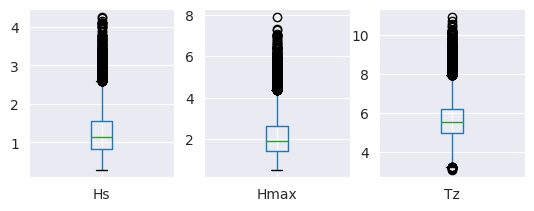

In [44]:
import matplotlib.pyplot as plt  # 导入图像库

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.subplot(2, 3, 1)
df[["Hs"]].boxplot(return_type='dict')
plt.subplot(2, 3, 2)
df[["Hmax"]].boxplot(return_type='dict')
plt.subplot(2, 3, 3)
df[["Tz"]].boxplot(return_type='dict')
plt.show()

## 分布分析

Hs极差为 3.963000 
Hmax极差为 7.396000
      Hs  Hmax     Tz     Tp  Peak Direction    SST       Hmax分组区间
0  0.763  1.15  4.520  5.513            49.0  25.65   [0.51, 1.25)
1  0.770  1.41  4.582  5.647            75.0  25.50  [1.25, 1.989)
2  0.747  1.16  4.515  5.083            91.0  25.45   [0.51, 1.25)
3  0.718  1.61  4.614  6.181            68.0  25.45  [1.25, 1.989)
4  0.707  1.34  4.568  4.705            73.0  25.50  [1.25, 1.989)


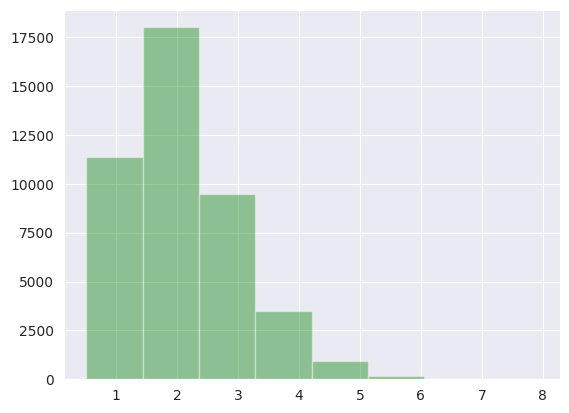

In [45]:
def d_range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return (krange)


# 创建函数求极差

key1 = 'Hs'
key2 = 'Hmax'
dr = d_range(df, key1, key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))
df[key2].hist(bins=8, color="g", histtype="bar", rwidth=10, alpha=0.4)
gcut = pd.cut(df[key2], 10, right=False)
gcut.value_counts()
# 频率分布情况  把分组区间匹配到表格中
gcut = pd.cut(df[key2], 10, right=False)
gcut_count = gcut.value_counts(sort=True)  #sort 为排序，True 排序   False  不排序
df['%s分组区间' % key2] = gcut.values
print(df.head())

## 统计量分析

In [46]:
def status(x):
    return pd.Series([x.count(), x.min(), x.idxmin(), x.quantile(.25), x.median(),
                      x.quantile(.75), x.mean(), x.max(), x.idxmax(), x.mad(), x.var(),
                      x.std(), x.skew(), x.kurt()], index=['总数', '最小值', '最小值位置', '25%分位数',
                                                           '中位数', '75%分位数', '均值', '最大值', '最大值位数',
                                                           '平均绝对偏差', '方差', '标准差',
                                                           '偏度', '峰度'])


# list(df.columns)
pd.DataFrame(status(df['Hs']))

,0
总数,43454.000000
最小值,0.294000
最小值位置,23646.000000
25%分位数,0.839000
中位数,1.130000
75%分位数,1.544000
均值,1.237799
最大值,4.257000
最大值位数,31116.000000
平均绝对偏差,0.419849


## 相关性分析

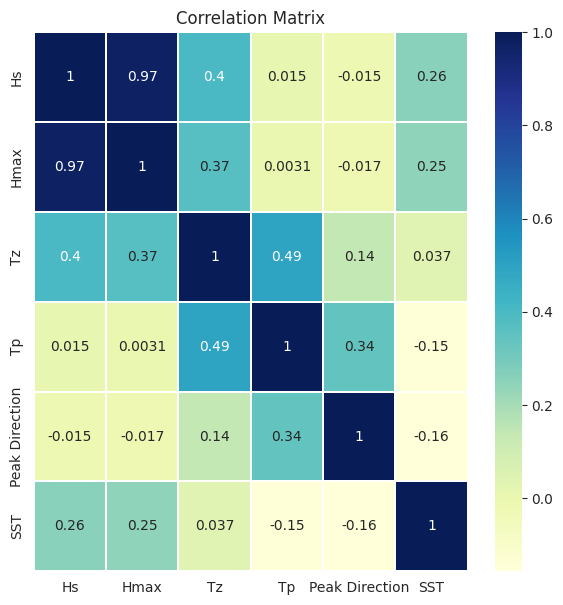

In [47]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show();

## 缺失值处理

In [48]:
import pandas as pd

df = pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
# Deleting NaN values
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.763,1.15,4.520,5.513,49.0,25.65
1,0.770,1.41,4.582,5.647,75.0,25.50
2,0.747,1.16,4.515,5.083,91.0,25.45
3,0.718,1.61,4.614,6.181,68.0,25.45
4,0.707,1.34,4.568,4.705,73.0,25.50


## 数据标准化

In [49]:
import pandas as pd


#数据的离差标准化
def MinMaxScale(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data


#数据的标准差标准化
def StandardScale(data):
    data = (data - data.mean()) / data.std()
    return data


df = pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
print(MinMaxScale(df['Hs']))
print(StandardScale(df["Hs"]))

0        0.000000
1        0.967530
2        0.966454
3        0.966522
4        0.966301
           ...   
43723    0.981201
43724    0.979051
43725    0.979838
43726    0.979166
43727    0.977620
Name: Hs, Length: 43728, dtype: float64
0       -22.501762
1        -0.037036
2        -0.062003
3        -0.060442
4        -0.065570
           ...    
43723     0.280402
43724     0.230468
43725     0.248747
43726     0.233143
43727     0.197253
Name: Hs, Length: 43728, dtype: float64


## 数据规约

In [50]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

#主成分分析
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df)
reduced

array([[-49.74121911,   2.06524866],
       [-23.75265962,   2.82830111],
       [ -7.78273334,   3.83394102],
       ...,
       [ -1.44546462,  -4.74987571],
       [ -6.50998477,  -3.35431919],
       [-14.4621583 ,  -4.62795837]])

## 数据变换

In [51]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
#数据的规范化
dfsm = df["Hs"]
print("最小最大规范化：\n", (dfsm - dfsm.min()) / (dfsm.max() - dfsm.min()))
print("零均值规范化：\n", (dfsm - dfsm.mean()) / dfsm.std())

最小最大规范化：
 0        0.118345
1        0.120111
2        0.114307
3        0.106990
4        0.104214
           ...   
43449    0.505930
43450    0.449407
43451    0.470098
43452    0.452435
43453    0.411809
Name: Hs, Length: 43454, dtype: float64
零均值规范化：
 0       -0.898205
1       -0.884963
2       -0.928473
3       -0.983334
4       -1.004144
           ...   
43449    2.007539
43450    1.583784
43451    1.738909
43452    1.606485
43453    1.301912
Name: Hs, Length: 43454, dtype: float64


## 数据离散化

In [53]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv')
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
#等宽法
bins = [0, 1, 2, 3, 4]
HsCut = pd.cut(df["Hs"], bins)
print(HsCut)


#等频法
def SameRateCut(data):
    k = 2
    w = data.quantile(np.arange(0, 1 + 1.0 / k, 1.0 / k))
    data = pd.cut(data, w)
    return data


result = SameRateCut(pd.Series(df["Hs"]))
result.value_counts()

0        (0, 1]
1        (0, 1]
2        (0, 1]
3        (0, 1]
4        (0, 1]
          ...  
43449    (2, 3]
43450    (2, 3]
43451    (2, 3]
43452    (2, 3]
43453    (1, 2]
Name: Hs, Length: 43454, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]


(0.294, 1.13]    21741
(1.13, 4.257]    21710
Name: Hs, dtype: int64